# Measuring the bubble's size evolution in time

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import progressbar
import cv2
import sys

plt.ioff()

# parametres
Db = 0.004     # diametre bulle

Uflow = {'1.18':93.6482,
         '1.24':125.1538,
         '1.73':333.5403,
         '2.00':433.8496,
         '3.00':771.1353,
         '4.00':1084.2369}

t = {}   # time
W = {}   # width
H = {}   # height

## Collecting data using image analysis

### $M = 1.18$

In [2]:
M = 1.18       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 440     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    if j < 90:
        gray_limit = 110
    else:
        gray_limit = 135
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
       
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmax+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 99% (438 of 440) |##################### | Elapsed Time: 0:00:19 ETA:   0:00:00

### $M = 1.24$

In [3]:
M = 1.24       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 440     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    if j < 90:
        gray_limit = 110
    else:
        gray_limit = 135
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
       
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmax+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 99% (438 of 440) |##################### | Elapsed Time: 0:00:20 ETA:   0:00:00

### $M = 1.73$

In [4]:
M = 1.73       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 180     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    #gray_limit = 50
    
    if j < 65:
        gray_limit = 50
    elif j < 161:
        gray_limit = 110
    else:
        gray_limit = 115
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
    
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmax+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 98% (178 of 180) |##################### | Elapsed Time: 0:00:08 ETA:   0:00:00

### $M = 2.00$

In [5]:
M = 2.00       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 148     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    #gray_limit = 50
    
    if j < 65:
        gray_limit = 50
    elif j < 161:
        gray_limit = 110
    else:
        gray_limit = 115
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
    
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmin+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 99% (147 of 148) |##################### | Elapsed Time: 0:00:06 ETA:   0:00:00

### $M = 3.00$

In [6]:
M = 3.00       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 86     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    #gray_limit = 50
    
    if j < 7:
        gray_limit = 40
    elif j < 17:
        gray_limit = 80
    elif j < 42:
        gray_limit = 110
    else:
        gray_limit = 130
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
    
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmin+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 98% (85 of 86) |####################### | Elapsed Time: 0:00:03 ETA:   0:00:00

### $M = 4.00$

In [7]:
M = 4.00       # Mach
t0 = - 0.001/(346.956*M) * 1e6    # initial time at the interaction choc/bubble
U = Uflow[f'{M:.2f}']   # m/s
T = Db / U * 1e6    # constant of time

n = 62     # number of files
source_path = f'../results/M{M:.2f}/images'
dest_path = f'../results_bubble_size/M{M:.2f}'

filenames = []
t[f'{M:.2f}'] = []
W[f'{M:.2f}'] = []
H[f'{M:.2f}'] = []

for i in range(1,n+1):
    filenames.append(f'vis2D_complet_rho_t{i*0.5:05.1f}')
    t[f'{M:.2f}'].append(t0+i*0.5)
    
bar = progressbar.ProgressBar(max_value=len(filenames))

for filename in filenames:
    im = cv2.imread(f'{source_path}/{filename}.png')

    if im is None:
        sys.exit("Could not read the image")
              
    # Cropping the image
    j = filenames.index(filename)
    # 361:2591 for selecting the entire domain
    a = 2591-361
    # we're going to find the closest screensize to 660 (adjust if needed)
    b = a - 660
    c = int(b/n)
    d = a - c*n   # integer screensize that we'll use
    im = im[175:618,361+c*j:361+d+c*j]
    #cv2.imshow('Cropped', im)
    #cv2.waitKey(0)

    # Grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    #cv2.imshow('Display window',gray)

    # Find Canny edges
    #edged = cv2.Canny(gray_neg, 30, 200)
    #cv2.imshow('Canny Edges After Contouring', edged)
    #cv2.waitKey(0)
    
    # Applying threshold mask
    #gray_limit = 50
    
    if j < 7:
        gray_limit = 40
    elif j < 13:
        gray_limit = 80
    elif j < 15:
        gray_limit = 100    
    else:
        gray_limit = 110
    
    ret,thresh = cv2.threshold(gray,gray_limit,255,cv2.THRESH_BINARY_INV)
    #cv2.imshow('Threshold', thresh)
    
    # Finding Contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    #print("Number of Contours found = " + str(len(contours)))
    
    # Defining the Bounding Boxes
    recs = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        recs.append((x, y, w, h))
    
    recs = np.array(recs)
    
    xmin = recs.min(axis=0)[0]
    xmax = -np.inf
    ymin = np.inf
    ymax = -np.inf
    
    for rec in recs:
        x, y, w, h = rec[0], rec[1], rec[2], rec[3]
        #cv2.rectangle(im, (x, y), (x+w, y+h), (255, 0, 0), 2)
        if x <= xmin:
            xmin = x
            xmax = x + w
            if y < ymin:
                ymin = y
            if y + h > ymax:
                ymax = y + h
    
    cv2.rectangle(im, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(im, f'L: {xmax-xmin}', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    cv2.putText(im, f'H: {ymax-ymin}', (xmin+10, int((ymin+ymax)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    tau = t[f'{M:.2f}'][j]/T
    cv2.putText(im, f'T: {tau:.2f}', (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    
    W[f'{M:.2f}'].append(xmax-xmin)
    H[f'{M:.2f}'].append(ymax-ymin)
    
    #cv2.drawContours(im, contours, -1, (255,0,0), 2)

    cv2.imwrite(f'{dest_path}/{filename}.png', im)

    #cv2.imshow('Contours',im)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    
    bar.update(j+1)

t[f'{M:.2f}'] = np.array(t[f'{M:.2f}'])
W[f'{M:.2f}'] = np.array(W[f'{M:.2f}'])
H[f'{M:.2f}'] = np.array(H[f'{M:.2f}'])

t[f'{M:.2f}'] = t[f'{M:.2f}']/T
W[f'{M:.2f}'] = W[f'{M:.2f}']/W[f'{M:.2f}'][0]
H[f'{M:.2f}'] = H[f'{M:.2f}']/H[f'{M:.2f}'][0]

 98% (61 of 62) |####################### | Elapsed Time: 0:00:02 ETA:   0:00:00

## Plotting graphics

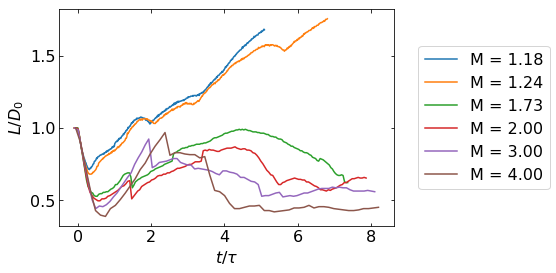

In [8]:
plt.rcParams.update({'font.size': 16})
plt.tick_params(direction='in', bottom=True, labelbottom=True, top=True, left=True, labelleft=True, right=True)
plt.ylabel(r'$L/D_{0}$')
plt.xlabel(r'$t/\tau$')
plt.plot(t['1.18'],W['1.18'])
plt.plot(t['1.24'],W['1.24'])
plt.plot(t['1.73'],W['1.73'])
plt.plot(t['2.00'],W['2.00'])
plt.plot(t['3.00'],W['3.00'])
plt.plot(t['4.00'],W['4.00'])
plt.legend(['M = 1.18', 'M = 1.24', 'M = 1.73', 'M = 2.00', 'M = 3.00', 'M = 4.00'], bbox_to_anchor=(1.05,0.5), loc='center left')
plt.show()

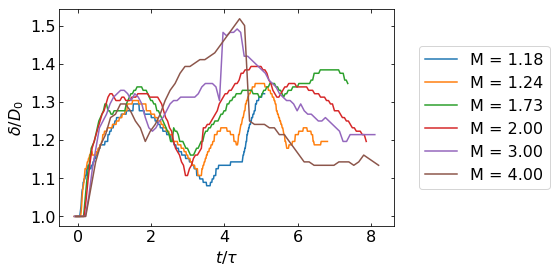

In [9]:
plt.rcParams.update({'font.size': 16})
plt.tick_params(direction='in', bottom=True, labelbottom=True, top=True, left=True, labelleft=True, right=True)
plt.ylabel(r'$\delta/D_{0}$')
plt.xlabel(r'$t/\tau$')
plt.plot(t['1.18'],H['1.18'])
plt.plot(t['1.24'],H['1.24'])
plt.plot(t['1.73'],H['1.73'])
plt.plot(t['2.00'],H['2.00'])
plt.plot(t['3.00'],H['3.00'])
plt.plot(t['4.00'],H['4.00'])
plt.legend(['M = 1.18', 'M = 1.24', 'M = 1.73', 'M = 2.00', 'M = 3.00', 'M = 4.00'], bbox_to_anchor=(1.05,0.5), loc='center left')
plt.show()